### Priprava podatkov za obdelavo

In [34]:
import matplotlib.pyplot as plt
from csv import DictReader
import numpy as np
from datetime import datetime


podatki = []
dtype = [
    ('Date', 'U10'),
    ('Time', 'U10'),
    ('Location', 'U100'),
    ('Operator', 'U100'),
    ('Flight', 'U100'),
    ('Route', 'U100'),
    ('Type', 'U100'),
    ('Registration', 'U100'),
    ('cn_In', 'U100'),
    ('Aboard', np.int32),
    ('Fatalities', np.int32),
    ('Ground', np.int32),
    ('Summary', 'U1000')
]

with open("podatki\\Airplane_Crashes_and_Fatalities_Since_1908.csv", 'r', encoding='utf-8') as file:
    csv_reader = DictReader(file)
    for row in csv_reader:
        date_str = row['Date']
        date_obj = datetime.strptime(date_str, '%m/%d/%Y')
        date_fixed = date_obj.strftime('%Y-%m-%d')
        
        time = row['Time']
        location = row['Location']
        operator = row['Operator']
        flightNr = row['Flight #']
        route = row['Route']
        type = row['Type']
        registration = row['Registration']
        CnIn = row['cn/In']
        aboard = int(row["Aboard"]) if row["Aboard"] else 0
        fatalities = int(row["Fatalities"]) if row["Fatalities"] else 0
        ground = int(row['Ground']) if row["Ground"] else 0
        summary = row['Summary']
        podatki.append((date_fixed, time, location, operator, flightNr, route, type, registration, CnIn, aboard, fatalities, ground, summary))



### Računanje št. nesreč letal skozi leta

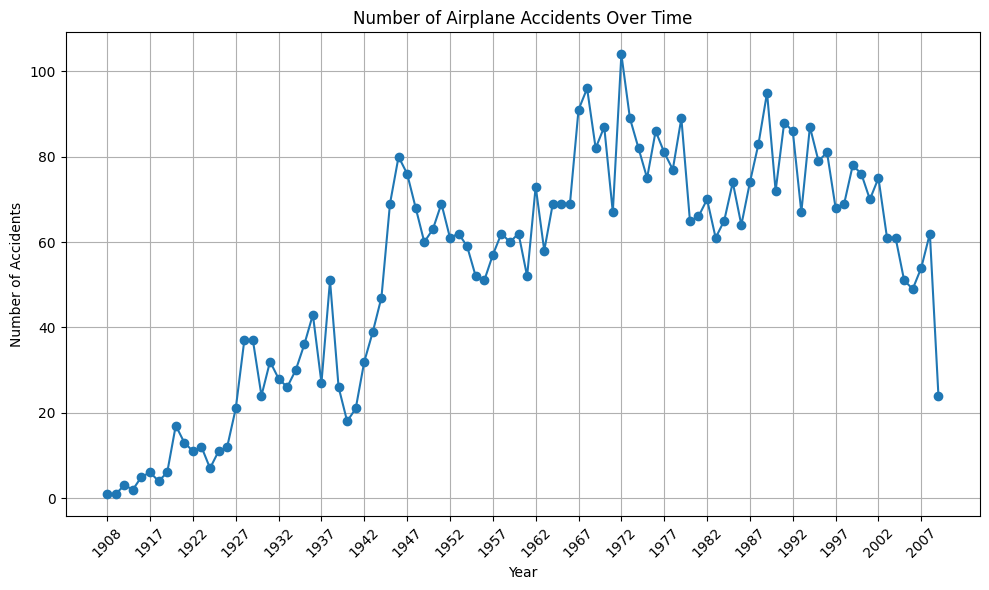

In [35]:
podatki = np.sort(np.array(podatki, dtype=dtype), order='Date')

years = np.array([crash[0][:4] for crash in podatki])
unique_years, crash_counts = np.unique(years, return_counts=True)

sorted_indices = np.argsort(unique_years)
unique_years_sorted = unique_years[sorted_indices]
crash_counts_sorted = crash_counts[sorted_indices]



years = np.unique([entry['Date'][:4] for entry in podatki])
num_accidents = [np.sum([1 for entry in podatki if entry['Date'].startswith(year)]) for year in years]

plt.figure(figsize=(10, 6))
plt.plot(years, num_accidents, marker='o', linestyle='-')
plt.title('Number of Airplane Accidents Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.xticks(years[::5], rotation=45) 
plt.tight_layout()
plt.show()


['Douglas DC-3' 'de Havilland Canada DHC-6 Twin Otter 300' 'Douglas C-47A'
 'Douglas C-47' 'Douglas DC-4' 'Yakovlev YAK-40' 'Antonov AN-26'
 'Junkers JU-52/3m' 'Douglas C-47B' 'De Havilland DH-4']
Douglas DC-3 : 334
de Havilland Canada DHC-6 Twin Otter 300 : 81
Douglas C-47A : 74
Douglas C-47 : 62
Douglas DC-4 : 40
Yakovlev YAK-40 : 37
Antonov AN-26 : 36
Junkers JU-52/3m : 32
Douglas C-47B : 29
De Havilland DH-4 : 28


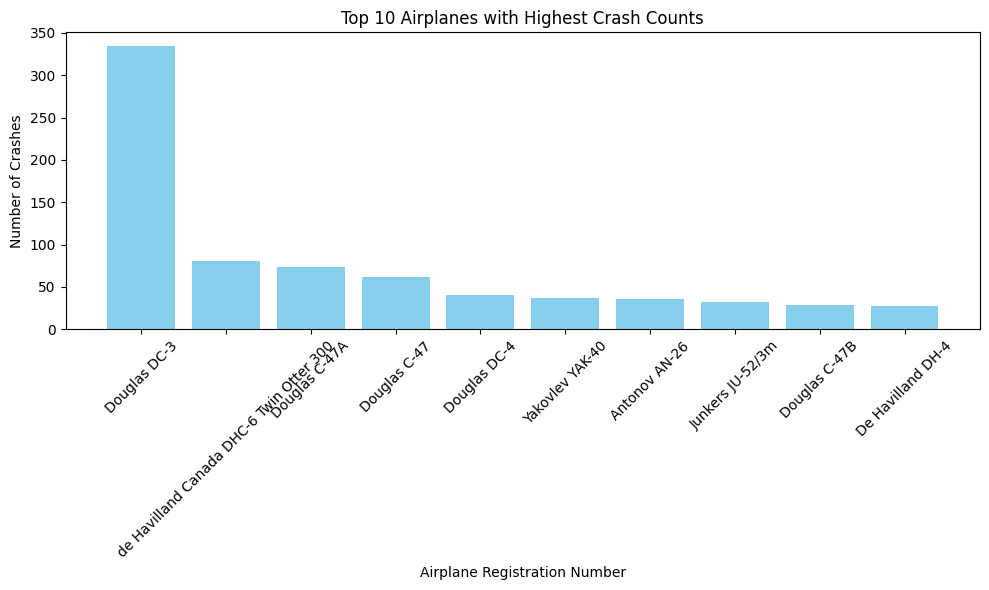

In [36]:
registrations = np.array([crash[6] for crash in podatki]) 

unique_registrations, counts = np.unique(registrations, return_counts=True)

sorted_indices = np.argsort(counts)[::-1]  
top_10_indices = sorted_indices[:10]  
top_10_airplanes = unique_registrations[top_10_indices] 

print(top_10_airplanes)

top_10_dict = {}

for airplane in top_10_airplanes:
    count = counts[np.where(unique_registrations == airplane)[0][0]] 
    print(airplane, ":", count)
    top_10_dict[airplane] = count

airplanes = list(top_10_dict.keys())
crash_counts = list(top_10_dict.values())

plt.figure(figsize=(10, 6))
plt.bar(airplanes, crash_counts, color='skyblue')
plt.title('Top 10 Airplanes with Highest Crash Counts')
plt.xlabel('Airplane Registration Number')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

209


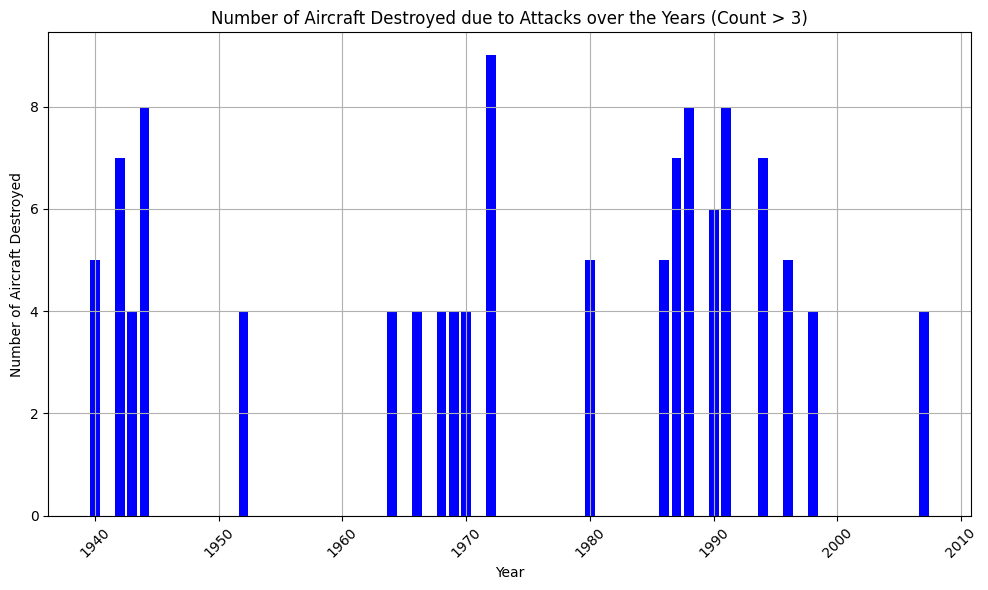

In [49]:
podatki = []
dtype = [
    ('Date', 'U10'),           # Date as string
    ('Time', 'U10'),            # Time as string
    ('Location', 'U100'),       # Location as string
    ('Operator', 'U100'),       # Operator as string
    ('Flight', 'U100'),         # Flight number as string
    ('Route', 'U100'),          # Route as string
    ('Type', 'U100'),           # Aircraft type as string
    ('Registration', 'U100'),   # Registration as string
    ('cn_In', 'U100'),          # Construction number or other identifier as string
    ('Aboard', np.int32),           # Number of people aboard as integer
    ('Fatalities', np.int32),       # Number of fatalities as integer
    ('Ground', np.int32),           # Number of ground fatalities as integer
    ('Summary', 'U1000')        # Summary as string
]

with open("podatki\\Airplane_Crashes_and_Fatalities_Since_1908.csv", 'r', encoding='utf-8') as file:
    csv_reader = DictReader(file)
    for row in csv_reader:
        date = row['Date']
        time = row['Time']
        location = row['Location']
        operator = row['Operator']
        flightNr = row['Flight #']
        route = row['Route']
        type = row['Type']
        registration = row['Registration']
        CnIn = row['cn/In']
        aboard = int(row["Aboard"]) if row["Aboard"] else 0
        fatalities = int(row["Fatalities"]) if row["Fatalities"] else 0
        ground = int(row['Ground']) if row["Ground"] else 0
        summary = row['Summary']
        podatki.append((date,time,location,operator,flightNr,route,type,registration,CnIn,aboard,fatalities,ground,summary))
podatki = np.sort(np.array(podatki,dtype=dtype), order='Date')

def unicena_letala():
    unicena = np.array([entry for entry in podatki if (
                                                        "shoot" in entry["Summary"].lower() 
                                                        or "shot" in entry["Summary"].lower()
                                                        or "attack" in entry["Summary"].lower()
                                                    )
                                                    and not(
                                                        "overshoot" in entry["Summary"].lower()
                                                        or "undershoot" in entry["Summary"].lower()
                                                    )
                                                    ])
    print(len(unicena))
    years,counts = np.unique([entry['Date'][-4:] for entry in unicena],return_counts=True)
    
    years_filtered = years[counts > 3]
    counts_filtered = counts[counts > 3]
    
    """for year,count in zip(years,counts):
        if(count>3):
            print(year,count)"""

    plt.figure(figsize=(10, 6))
    plt.bar(years_filtered.astype(int), counts_filtered, color='blue')
    plt.xlabel('Year')
    plt.ylabel('Number of Aircraft Destroyed')
    plt.title('Number of Aircraft Destroyed due to Attacks over the Years (Count > 3)')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
unicena_letala()

**Faulty design**

In [51]:
def faulty_letala():
    faulty = np.array([entry for entry in podatki if (
                                                        "faulty design" in entry["Summary"].lower() 
                                                        or "design flaw" in entry["Summary"].lower()
                                                        or "design deficiencies" in entry["Summary"].lower()

                                                    )

                                                    ])
    


    print(len(faulty["Summary"]))

faulty_letala()

16


**Water**

In [39]:
def water_letala():
    faulty = np.array([entry for entry in podatki if (
                                                        "ocean" in entry["Summary"].lower() 
                                                        or "water" in entry["Summary"].lower()
                                                        or "swamp" in entry["Summary"].lower()
                                                        or "sea" in entry["Summary"].lower()    
                                                        or "river" in entry["Summary"].lower()  
                                                    )

                                                    ])
    print(len(faulty["Summary"]))

water_letala()

617


**Low fuel**

In [40]:
def fuel_letala():
    faulty = np.array([entry for entry in podatki if (
                                                        "low fuel" in entry["Summary"].lower() 
                                                        or "fuel exhaustion" in entry["Summary"].lower() 
                                                        or "ran out of fuel" in entry["Summary"].lower() 
                                                        or "running out of fuel" in entry["Summary"].lower() 
                                                    )

                                                    ])
    print(len(faulty["Summary"]))

fuel_letala()

66


**Birds**

In [41]:
def bird_letala():
    faulty = np.array([entry for entry in podatki if (
                                                        "bird" in entry["Summary"].lower()
                                                        or "geese" in entry["Summary"].lower()
                                                        or "flock" in entry["Summary"].lower()
                                                    )

                                                    ])
    print(len(faulty["Summary"]))
    print(faulty["Summary"])

bird_letala()

12
['The plane was taking off from La Guardia Airport when possibly, both engines were disabled after striking a flock of geese. The crew was able to ditch the plane in the Hudson River, making a soft landing. All 150 passengers and crew of 5 made it out safely before the plane began to sink. No one was reported to be seriously injured.'
 'The plane flew into a flock of birds that were injested into the left engine.  The pilot soon after reported an engine fire and that he was returning to the airport.  However, control of the plane was lost and the aircraft crashed.'
 'The crew abandoned their takeoff after the loss of an engine due to bird ingestion. The jet overshot the runway and collided with a truck, killing the driver. The landing gear sheared off and the plane came to rest in a field.'
 "The aircraft was believed to have gone into a spin or spiral dive with recovery at about 12,000 ft. The dive apparently caused structural damage which resulted in the aircraft plunging into St 

Uspešnost letalskih podjetij glede na število mrtvih, število potnikov in število letov

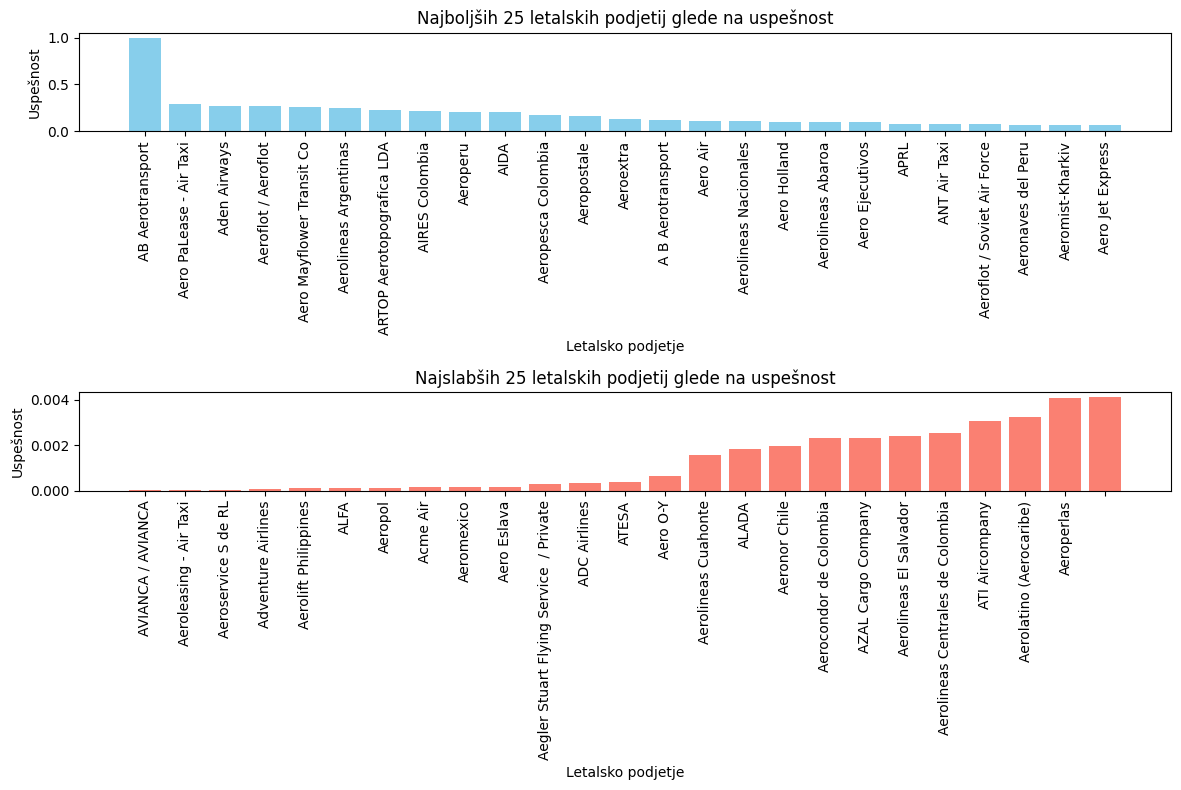

In [42]:
# Izračunamo izraz (število žrtev * število potnikov) - število letal za vsako letalsko podjetje
podjetja = np.unique([entry['Operator'] for entry in podatki])
uspešnost = []
for podjetje in podjetja:
    nesreče_podjetja = [entry for entry in podatki if entry['Operator'] == podjetje]
    število_letov = np.sum([1 for entry in podatki if entry['Operator'] == podjetje])
    if(število_letov > 5):
        skupno_mrtvih = np.sum([entry['Fatalities'] for entry in nesreče_podjetja])
        skupno_potnikov = np.sum([entry['Aboard'] for entry in nesreče_podjetja])
        
        izraz = (skupno_mrtvih * skupno_potnikov) / število_letov
        uspešnost.append(izraz)

max_uspešnost = max(uspešnost)
uspešnost = [x / max_uspešnost for x in uspešnost]



# Pridobimo top 25 in lowest 25 letalskih podjetij glede na izraz
sorted_indices_top = np.argsort(uspešnost)[::-1][:25]
sorted_indices_lowest = np.argsort(uspešnost)[:25]
top_podjetja = podjetja[sorted_indices_top]
lowest_podjetja = podjetja[sorted_indices_lowest]
top_uspešnost = np.array(uspešnost)[sorted_indices_top]
lowest_uspešnost = np.array(uspešnost)[sorted_indices_lowest]

# Priprava stolpičnih grafov
plt.figure(figsize=(12, 8))

# Top 25 letalskih podjetij
plt.subplot(2, 1, 1)
plt.bar(top_podjetja, top_uspešnost, color='skyblue')
plt.xlabel('Letalsko podjetje')
plt.ylabel('Uspešnost')
plt.title('Najboljših 25 letalskih podjetij glede na uspešnost')
plt.xticks(rotation=90)

# Lowest 25 letalskih podjetij
plt.subplot(2, 1, 2)
plt.bar(lowest_podjetja, lowest_uspešnost, color='salmon')
plt.xlabel('Letalsko podjetje')
plt.ylabel('Uspešnost')
plt.title('Najslabših 25 letalskih podjetij glede na uspešnost')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [53]:
# ZEMLJEVID SVETA - Pridobivanje koordinat in shranjevanje v .csv datoteko
# !! PROGRAM TEČE OKOLI 3 URE !! PODATKI SO ŽE V CSV DATOTEKI !!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import time
import requests
"""
base_url = "https://nominatim.openstreetmap.org/search.php"
lokacije = np.array([crash[2] for crash in podatki])
koordinate = []
for lokacija in lokacije:
    time.sleep(2)
    params = {
        'q': lokacija,
        'format': 'json'
    }
    response = requests.get(base_url, params=params)
    if response.status_code == 200:
        data = response.json()
        if data:
            print("Display Name:", data[0]['display_name'])
            print("Latitude:", data[0]['lat'])
            print("Longitude:", data[0]['lon'])
            koordinate.append(data[0])
        else:
            print("No results found")

    else:
        print("Failed to fetch data")

crash_data = pd.DataFrame({
    'Location Name': [koordinata['display_name'] for koordinata in koordinate],
    'Latitude': [float(koordinata['lat']) for koordinata in koordinate],
    'Longitude': [float(koordinata['lon']) for koordinata in koordinate]
})
# Shrani DataFrame v .csv datoteko
crash_data.to_csv('podatki/koordinate.csv', index=False)
"""

'\nbase_url = "https://nominatim.openstreetmap.org/search.php"\nlokacije = np.array([crash[2] for crash in podatki])\nkoordinate = []\nfor lokacija in lokacije:\n    time.sleep(2)\n    params = {\n        \'q\': lokacija,\n        \'format\': \'json\'\n    }\n    response = requests.get(base_url, params=params)\n    if response.status_code == 200:\n        data = response.json()\n        if data:\n            print("Display Name:", data[0][\'display_name\'])\n            print("Latitude:", data[0][\'lat\'])\n            print("Longitude:", data[0][\'lon\'])\n            koordinate.append(data[0])\n        else:\n            print("No results found")\n\n    else:\n        print("Failed to fetch data")\n\ncrash_data = pd.DataFrame({\n    \'Location Name\': [koordinata[\'display_name\'] for koordinata in koordinate],\n    \'Latitude\': [float(koordinata[\'lat\']) for koordinata in koordinate],\n    \'Longitude\': [float(koordinata[\'lon\']) for koordinata in koordinate]\n})\n# Shrani Data

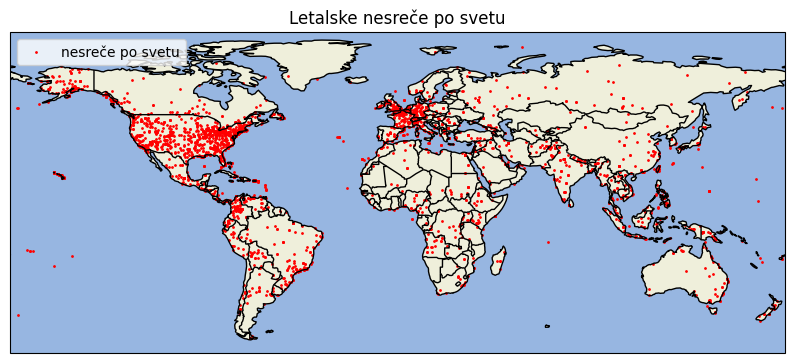

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

koordinate = []
with open("podatki\\koordinate.csv", 'r', encoding='utf-8') as file:
    csv_reader = DictReader(file)
    for row in csv_reader:
        location = row['Location Name']
        latitude = float(row["Latitude"]) if row["Latitude"] else 0.0
        longitude = float(row["Longitude"]) if row["Longitude"] else 0.0
        koordinate.append((location, latitude, longitude))

crash_data = pd.DataFrame({
    'Location Name': [koordinata[0] for koordinata in koordinate],
    'Latitude': [float(koordinata[1]) for koordinata in koordinate],
    'Longitude': [float(koordinata[2]) for koordinata in koordinate]
})

plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)

plt.scatter(crash_data['Longitude'], crash_data['Latitude'], color='red', marker='o', label='nesreče po svetu', s=1)
plt.legend()
plt.title('Letalske nesreče po svetu')
plt.show()